# Study of collinearity focusing on practical application

## Abstract

This empirical study is based on my interest about what will happen if there is collinearity in regression and how can I detect it easily. In class, Jiaming has already shown the regression results of regressing two obviously highly correlated variables,"rating" and "limit"(which are nearly perfect collinear), with a large p-value equal to 0.7. However, I test two varibles with no obvious correlation in my study. Results are as follows.

## Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
Data = pd.read_csv("C:/Users/shell/Documents/learning in 19_20/微观计量经济学/homework/german_credit_data.csv")
Data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Creditamount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


<Figure size 432x288 with 0 Axes>

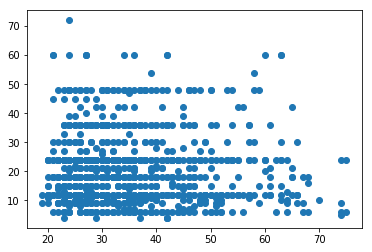

<Figure size 432x288 with 0 Axes>

In [3]:
plt.scatter(Data['Age'],Data["Duration"])
plt.figure()

<Figure size 432x288 with 0 Axes>

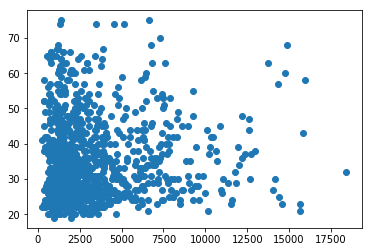

<Figure size 432x288 with 0 Axes>

In [4]:
plt.scatter(Data['Creditamount'],Data["Age"])
plt.figure()

<Figure size 432x288 with 0 Axes>

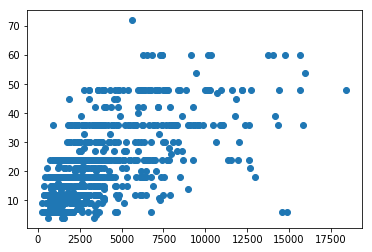

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(Data['Creditamount'],Data["Duration"])
plt.figure()

The above graph shows the two variables, "Credit amount" and "Duration" are likely to be correlated, which will result in high collinearity in regression. The regression tests are as follows.

## Regression

In [6]:
mod1=smf.ols( 'Creditamount~Age+Duration',data=Data).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Creditamount   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     323.7
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          4.80e-109
Time:                        17:54:22   Log-Likelihood:                -9113.7
No. Observations:                1000   AIC:                         1.823e+04
Df Residuals:                     997   BIC:                         1.825e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -284.9942    262.100     -1.087      0.277    -799.325     229.337
Age           13.7405      6.123      2.244      0.025       1.724      25.757
Duration     146.7652      5.776     25.408      0.000     135.430     158.100
==============================================================================
Omnibus:                      396.837   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1909.065
Skew:                           1.799   Prob(JB):                         0.00
Kurtosis:                       8.734   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
mod2=smf.ols( 'Age~Creditamount+Duration',data=Data).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.173
Date:                Sat, 09 Nov 2019   Prob (F-statistic):             0.0423
Time:                        17:54:22   Log-Likelihood:                -3846.7
No. Observations:                1000   AIC:                             7699.
Df Residuals:                     997   BIC:                             7714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.1806      0.719     50.291      0.000      34.769      37.592
Creditamount     0.0004      0.000      2.244      0.025    4.59e-05       0.001
Duration        -0.0876      0.038     -2.296      0.022      -0.162      -0.013
==============================================================================
Omnibus:                      130.388   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.951
Skew:                           1.006   Prob(JB):                     5.09e-40
Kurtosis:                       3.541   Cond. No.                     8.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It gives out the warning saying that there might exists strong multicollinearity because of the large condition number, which seems to be correct, though all the p-value of the coefficients are smaller than 0.05, indicating that results are signicant. 

I do the regression in Stata as well, but Stata doesn't give any feedback about collinearity. It seems naturally to come to the conclusion that python will be a better choice if we are not so sure about the high collinearity among variables.But it's also worth to mention that when there is perfect multicollineatity, Stata will intelligently neglect one of these variables and do the regression, which is very convenient. So, it depends.

To verify there exists collinearity, I did a regression to calculate the Variance inflation factor (VLF) which was introduced as a dectecting method in class:

In [10]:
mod3=smf.ols('Creditamount~Duration',data=Data).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Creditamount   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     639.7
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          1.86e-109
Time:                        18:01:33   Log-Likelihood:                -9116.3
No. Observations:                1000   AIC:                         1.824e+04
Df Residuals:                     998   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    213.2160    139.569      1.528      0.127     -60.666     487.098
Duration     146.2968      5.784     25.292      0.000     134.946     157.648
==============================================================================
Omnibus:                      403.610   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1973.377
Skew:                           1.828   Prob(JB):                         0.00
Kurtosis:                       8.830   Cond. No.                         48.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above regression, we know that $R^2$ of the variable Credit amount is 0.391. Since:$$VLF(\beta)=\frac{1}{1-R^2}=1.642>1$$ This large VLF verifies a problematic collinearity.

After leatning the method of adding an interaction term as a regressor, which also deals with the interactive effect between the orignal regressors, I want to have a try by adding the interaction term of credit amount and duration and see whether there won't be warning about collinearity anymore.

In [9]:
mod4=smf.ols( 'Age~Creditamount+Duration+Creditamount*Duration',data=Data).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.117
Date:                Sat, 09 Nov 2019   Prob (F-statistic):             0.0964
Time:                        17:54:23   Log-Likelihood:                -3846.7
No. Observations:                1000   AIC:                             7701.
Df Residuals:                     996   BIC:                             7721.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.2750      1.101     32.942      0.000      34.114      38.436
Creditamount              0.0003      0.000      1.101      0.271      -0.000       0.001
Duration                 -0.0918      0.053     -1.725      0.085      -0.196       0.013
Creditamount:Duration  9.939e-07   8.78e-06      0.113      0.910   -1.62e-05    1.82e-05
==============================================================================
Omnibus:                      130.283   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.757
Skew:                           1.006   Prob(JB):                     5.61e-40
Kurtosis:                       3.541   Cond. No.                     4.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, it seems my hypothesis failed. Adding an interaction term of the highly correlated variable can't solve the problem. Therefore I make a research and find that there are mainly 3 methods being used: PCA,Stepwise Regression and Ridge regression. The three are all excellent and widely used methods in multiple regression. Maybe they'll be introduced next time.

### Reference
German Credit Data Analysis(Python):
https://www.kaggle.com/vigneshj6/german-credit-data-analysis-python/notebook?q=Credit+data